In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\lmattaparthi\appdata\local\anaconda3\lib\site-packages (2.19.0)




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam


In [5]:
path="C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/"
if os.path.exists(path):
    if os.path.isdir(path):
        print('Path exists and is a directory.')
    elif os.path.isfile(path):
        print('Path exists and is a file.')
    else:
        print('Path exists but is neither a file nor a directory.')
else:
    print('Path does not exist.')

Path exists and is a directory.


# Loading Data

In [6]:
data_dir = 'C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/'

features = []
target = []

for i in range(46):  # 46 classes (0-45)
    class_path = os.path.join(data_dir, str(i))
    print("cp",class_path)
    if not os.path.exists(class_path):
        print(f"Warning: Class {i} directory not found")
        continue
    
    images = os.listdir(class_path)
    for image_name in images:
        try:
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (32, 32))
                features.append(image)
                target.append(i)
        except:
            continue
    print(f"Class {i} loaded")


cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/0
Class 0 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/1
Class 1 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/2
Class 2 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/3
Class 3 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/4
Class 4 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/5
Class 5 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/6
Class 6 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/7
Class 7 loaded
cp C:/Users/lmattaparthi/OneDrive - MODEL N, INC/Documents/road-sign-voice-alert/datasettraffic/

In [7]:
features = np.array(features)
target = np.array(target)

print("Original data shapes:")
print("features:", features.shape)
print("target:", target.shape)

Original data shapes:
features: (35527, 32, 32, 3)
target: (35527,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print('Data shapes:')
print("Training data: ", X_train.shape)
print("Testing data: ", X_test.shape)
print("Training labels: ", y_train.shape)
print("Testing labels: ", y_test.shape)


Data shapes:
Training data:  (24868, 32, 32, 3)
Testing data:  (10659, 32, 32, 3)
Training labels:  (24868,)
Testing labels:  (10659,)


# Preprocessing images

In [9]:
def preprocess_image(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

      

In [10]:
# 4. Convert labels to categorical
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

print("Final shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Final shapes:
X_train: (24868, 32, 32, 1)
X_test: (10659, 32, 32, 1)
y_train: (24868, 46)
y_test: (10659, 46)


# Building the model

In [11]:
#Image Data Generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)


In [12]:
batches = datagen.flow(X_train, y_train, batch_size=30)  # Use y_train, not X_test
X_batch, y_batch = next(batches)

print("Batch shapes:")
print(f"X_batch shape: {X_batch.shape}")
print(f"y_batch shape: {y_batch.shape}")

Batch shapes:
X_batch shape: (30, 32, 32, 1)
y_batch shape: (30, 46)


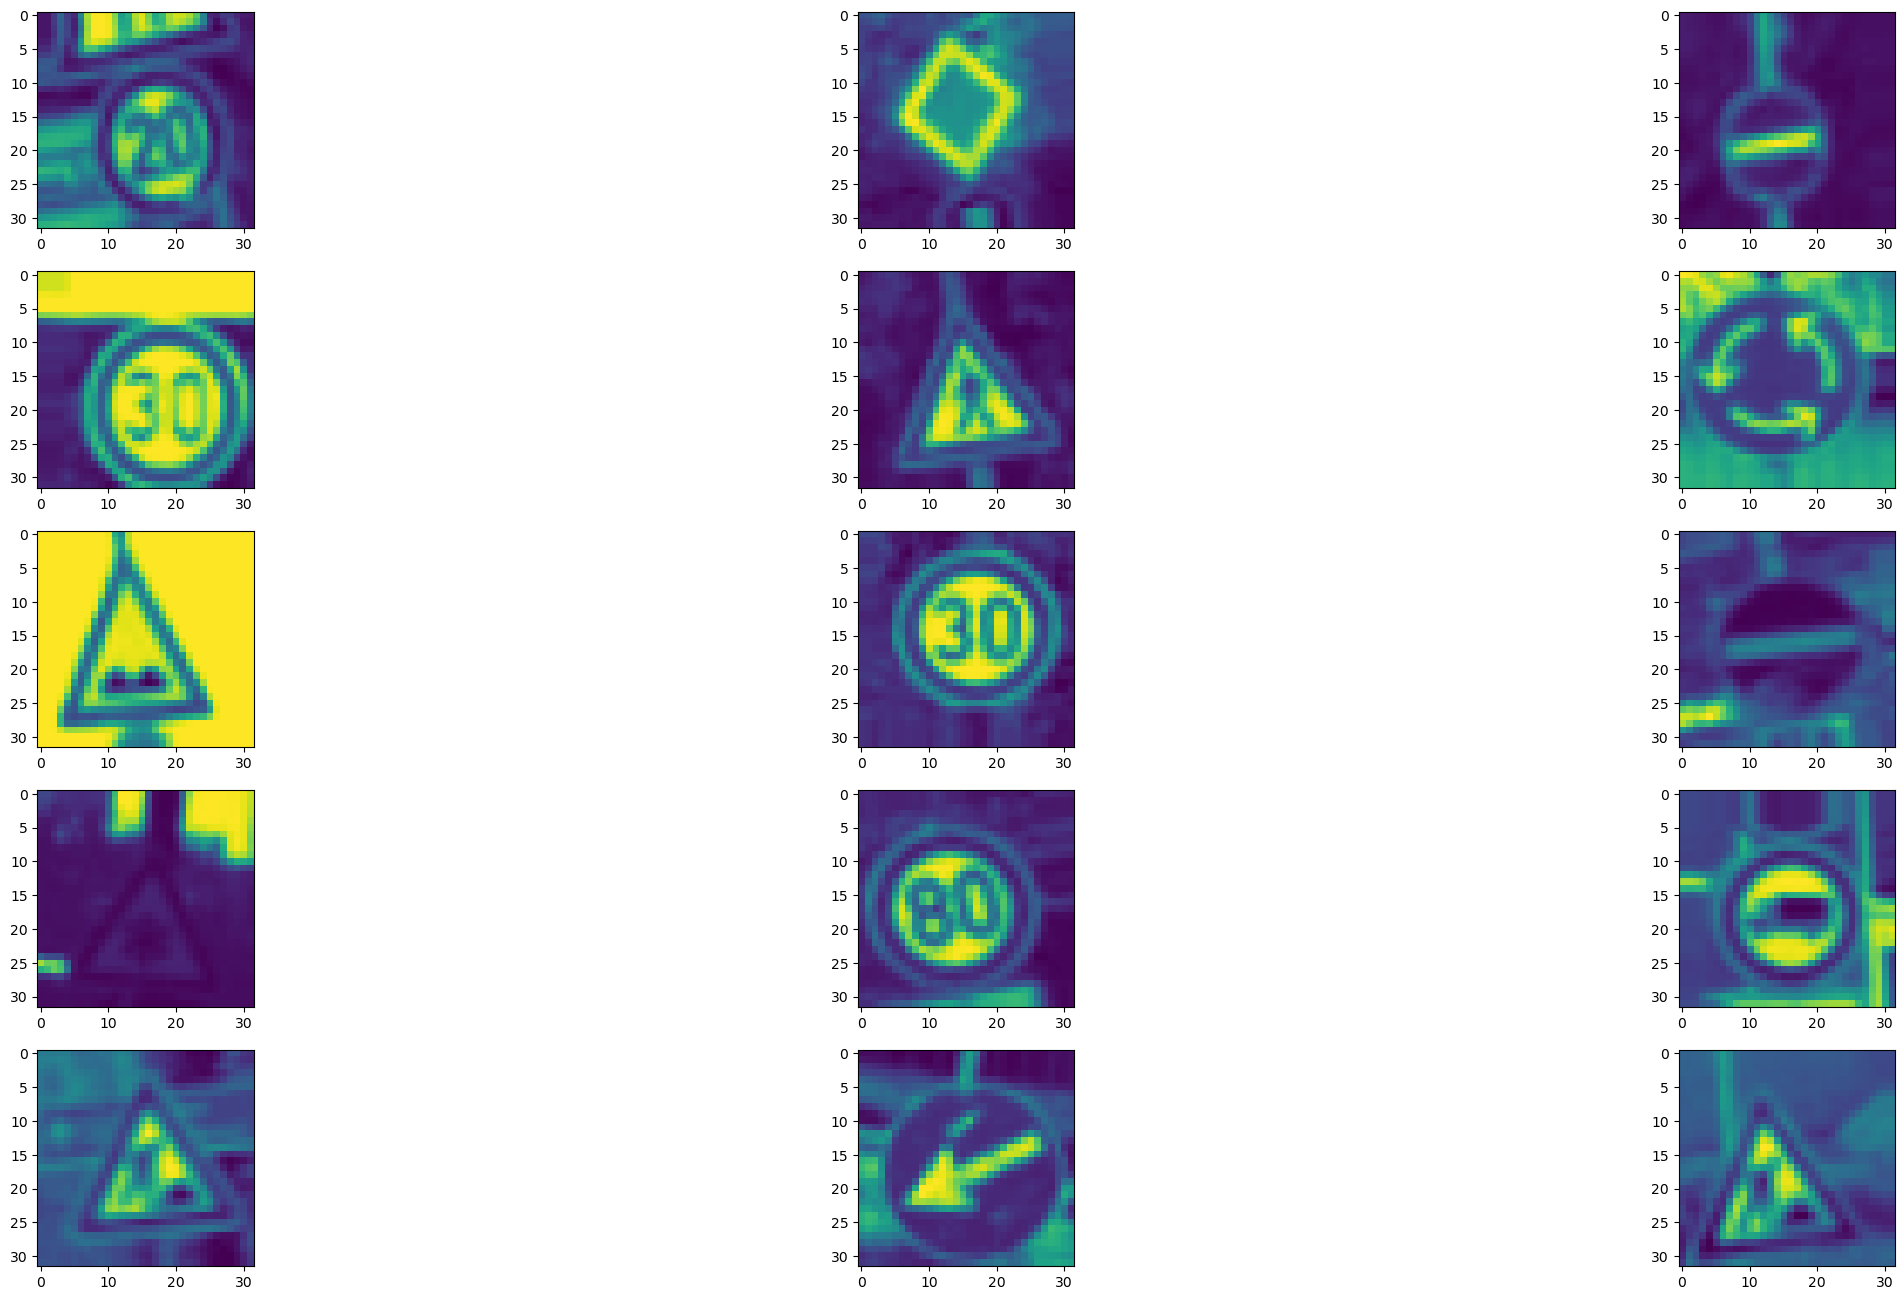

In [13]:
plt.figure(figsize=(30,50))
for i in range(15):
    plt.subplot(15,3,i+1)
    plt.imshow(X_batch[i].reshape((32,32)))
plt.show()

In [14]:
model = Sequential([
    Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"),
    Conv2D(60, (5,5), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(30, (3,3), activation="relu"),
    Conv2D(30, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(500, activation="relu"),
    Dropout(0.5),
    Dense(46, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


C:\Users\lmattaparthi\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
train_gen = datagen.flow(X_train, y_train, batch_size=30)
val_gen = datagen.flow(X_test, y_test, batch_size=30)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


Epoch 1/15


C:\Users\lmattaparthi\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


829/829 ━━━━━━━━━━━━━━━━━━━━ 67s 76ms/step - accuracy: 0.0871 - loss: 3.4566 - val_accuracy: 0.5612 - val_loss: 1.5363
Epoch 2/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 61s 74ms/step - accuracy: 0.5571 - loss: 1.4884 - val_accuracy: 0.8475 - val_loss: 0.5727
Epoch 3/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.7746 - loss: 0.7533 - val_accuracy: 0.9177 - val_loss: 0.2829
Epoch 4/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 66s 80ms/step - accuracy: 0.8342 - loss: 0.5428 - val_accuracy: 0.9343 - val_loss: 0.2364
Epoch 5/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 71s 86ms/step - accuracy: 0.8686 - loss: 0.4378 - val_accuracy: 0.9521 - val_loss: 0.1745
Epoch 6/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 68s 82ms/step - accuracy: 0.8845 - loss: 0.3798 - val_accuracy: 0.9530 - val_loss: 0.1670
Epoch 7/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 67s 80ms/step - accuracy: 0.9033 - loss: 0.3210 - val_accuracy: 0.9568 - val_loss: 0.1495
Epoch 8/15
829/829 ━━━━━━━━━━━━━━━━━━━━ 68s 81ms/step - accuracy: 0.9062 - loss: 0.2997 - val_accurac

In [16]:
model.save("my_model.keras")


In [17]:
score = model.evaluate(X_test, y_test)
print(f"Test accuracy: {score[1]:.4f}")

334/334 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9887 - loss: 0.0387
Test accuracy: 0.9883


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [19]:
print("="*60)
print("           EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic dataset information
print(f"Total number of images: {len(features)}")
print(f"Image shape: {features[0].shape}")
print(f"Number of classes: {len(np.unique(target))}")
print(f"Class range: {np.min(target)} to {np.max(target)}")
print(f"Dataset size in MB: {features.nbytes / (1024*1024):.2f} MB")


           EXPLORATORY DATA ANALYSIS
Total number of images: 35527
Image shape: (32, 32, 3)
Number of classes: 46
Class range: 0 to 45
Dataset size in MB: 104.08 MB


In [20]:
class_counts = Counter(target)
print(f"\nClass distribution summary:")
print(f"Most common class: {max(class_counts, key=class_counts.get)} with {max(class_counts.values())} images")
print(f"Least common class: {min(class_counts, key=class_counts.get)} with {min(class_counts.values())} images")
print(f"Average images per class: {len(target) / len(np.unique(target)):.1f}")



Class distribution summary:
Most common class: 2 with 2010 images
Least common class: 0 with 157 images
Average images per class: 772.3


In [21]:
df = pd.DataFrame({
    'class': target,
    'count': 1
})
class_summary = df.groupby('class').count().reset_index()
class_summary.columns = ['Class', 'Count']

print("\nClass-wise image count:")
print(class_summary.to_string(index=False))


Class-wise image count:
 Class  Count
     0    157
     1   1981
     2   2010
     3   1260
     4   1770
     5   1650
     6    360
     7   1290
     8   1260
     9   1320
    10   1800
    11   1170
    12   1890
    13   1920
    14    690
    15    540
    16    360
    17    990
    18   1080
    19    180
    20    300
    21    270
    22    330
    23    450
    24    240
    25   1350
    26    540
    27    210
    28    480
    29    240
    30    390
    31    690
    32    210
    33    599
    34    360
    35   1080
    36    330
    37    180
    38   1860
    39    270
    40    300
    41    210
    42    210
    43    250
    44    250
    45    250


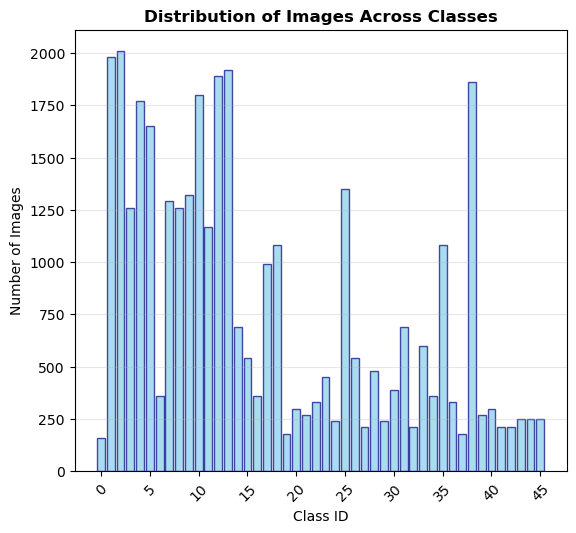

In [22]:
# Replace your problematic plotting code with this safer version

# Data Visualization - Class Distribution (FIXED VERSION)
plt.figure(figsize=(16, 10))  # Reduced from (20, 12)

# 1. Class distribution bar plot
plt.subplot(2, 3, 1)
classes, counts = np.unique(target, return_counts=True)

# Limit the number of classes shown if too many
if len(classes) > 50:
    # Show only first 46 classes or sample them
    classes = classes[:46]
    counts = counts[:46]

bars = plt.bar(classes, counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Distribution of Images Across Classes', fontsize=12, fontweight='bold')
plt.xlabel('Class ID', fontsize=10)
plt.ylabel('Number of Images', fontsize=10)

# Reduce number of x-ticks to prevent overcrowding
if len(classes) > 20:
    plt.xticks(range(0, len(classes), 5), rotation=45)
else:
    plt.xticks(classes, rotation=45)

plt.grid(axis='y', alpha=0.3)

# Add value labels only for reasonable number of bars
if len(bars) <= 20:
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
                 str(count), ha='center', va='bottom', fontsize=8)

# Continue with other subplots...
plt.tight_layout()
plt.show()

Sampling 10000 from 35527 total samples for visualization


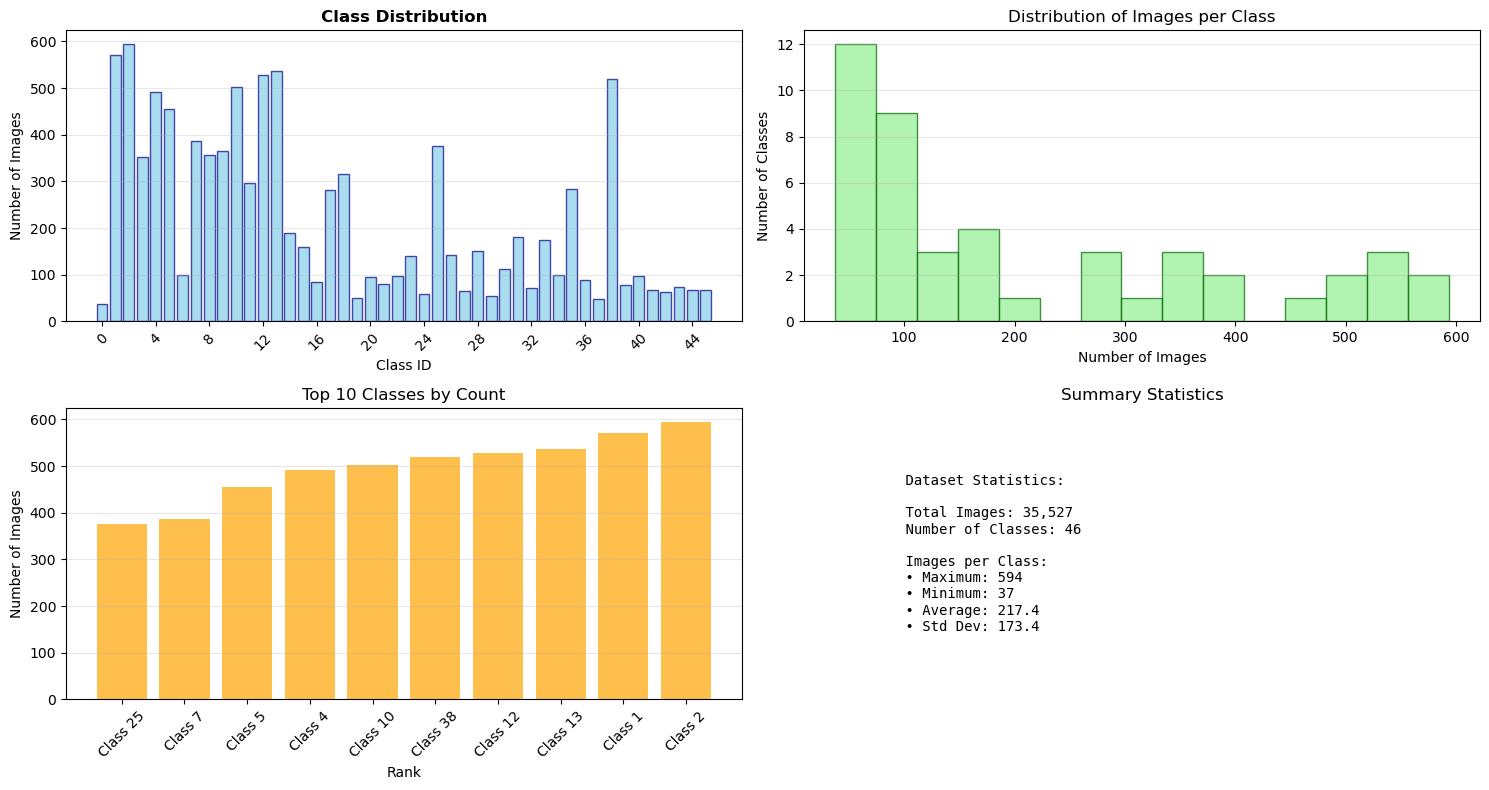

In [23]:
# For large datasets, sample data for visualization
def safe_plot_class_distribution(target, max_samples=10000):
    """Safely plot class distribution with sampling for large datasets"""
    
    # Sample data if too large
    if len(target) > max_samples:
        sample_indices = np.random.choice(len(target), max_samples, replace=False)
        target_sample = target[sample_indices]
        print(f"Sampling {max_samples} from {len(target)} total samples for visualization")
    else:
        target_sample = target
    
    plt.figure(figsize=(15, 8))
    
    # Get class distribution
    classes, counts = np.unique(target_sample, return_counts=True)
    
    # Plot 1: Bar chart
    plt.subplot(2, 2, 1)
    bars = plt.bar(classes, counts, color='skyblue', edgecolor='navy', alpha=0.7)
    plt.title('Class Distribution', fontweight='bold')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Images')
    plt.xticks(range(0, len(classes), max(1, len(classes)//10)), rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 2: Histogram of counts
    plt.subplot(2, 2, 2)
    plt.hist(counts, bins=min(15, len(counts)), color='lightgreen', edgecolor='darkgreen', alpha=0.7)
    plt.title('Distribution of Images per Class')
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Classes')
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 3: Top 10 classes
    plt.subplot(2, 2, 3)
    top_indices = np.argsort(counts)[-10:]
    plt.bar(range(10), counts[top_indices], color='orange', alpha=0.7)
    plt.title('Top 10 Classes by Count')
    plt.xlabel('Rank')
    plt.ylabel('Number of Images')
    plt.xticks(range(10), [f"Class {classes[i]}" for i in top_indices], rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Plot 4: Statistics
    plt.subplot(2, 2, 4)
    stats_text = f"""
    Dataset Statistics:
    
    Total Images: {len(target):,}
    Number of Classes: {len(np.unique(target))}
    
    Images per Class:
    • Maximum: {np.max(counts):,}
    • Minimum: {np.min(counts):,}
    • Average: {np.mean(counts):.1f}
    • Std Dev: {np.std(counts):.1f}
    """
    plt.text(0.1, 0.5, stats_text, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='center', fontfamily='monospace')
    plt.title('Summary Statistics')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Use the safe plotting function
safe_plot_class_distribution(target)

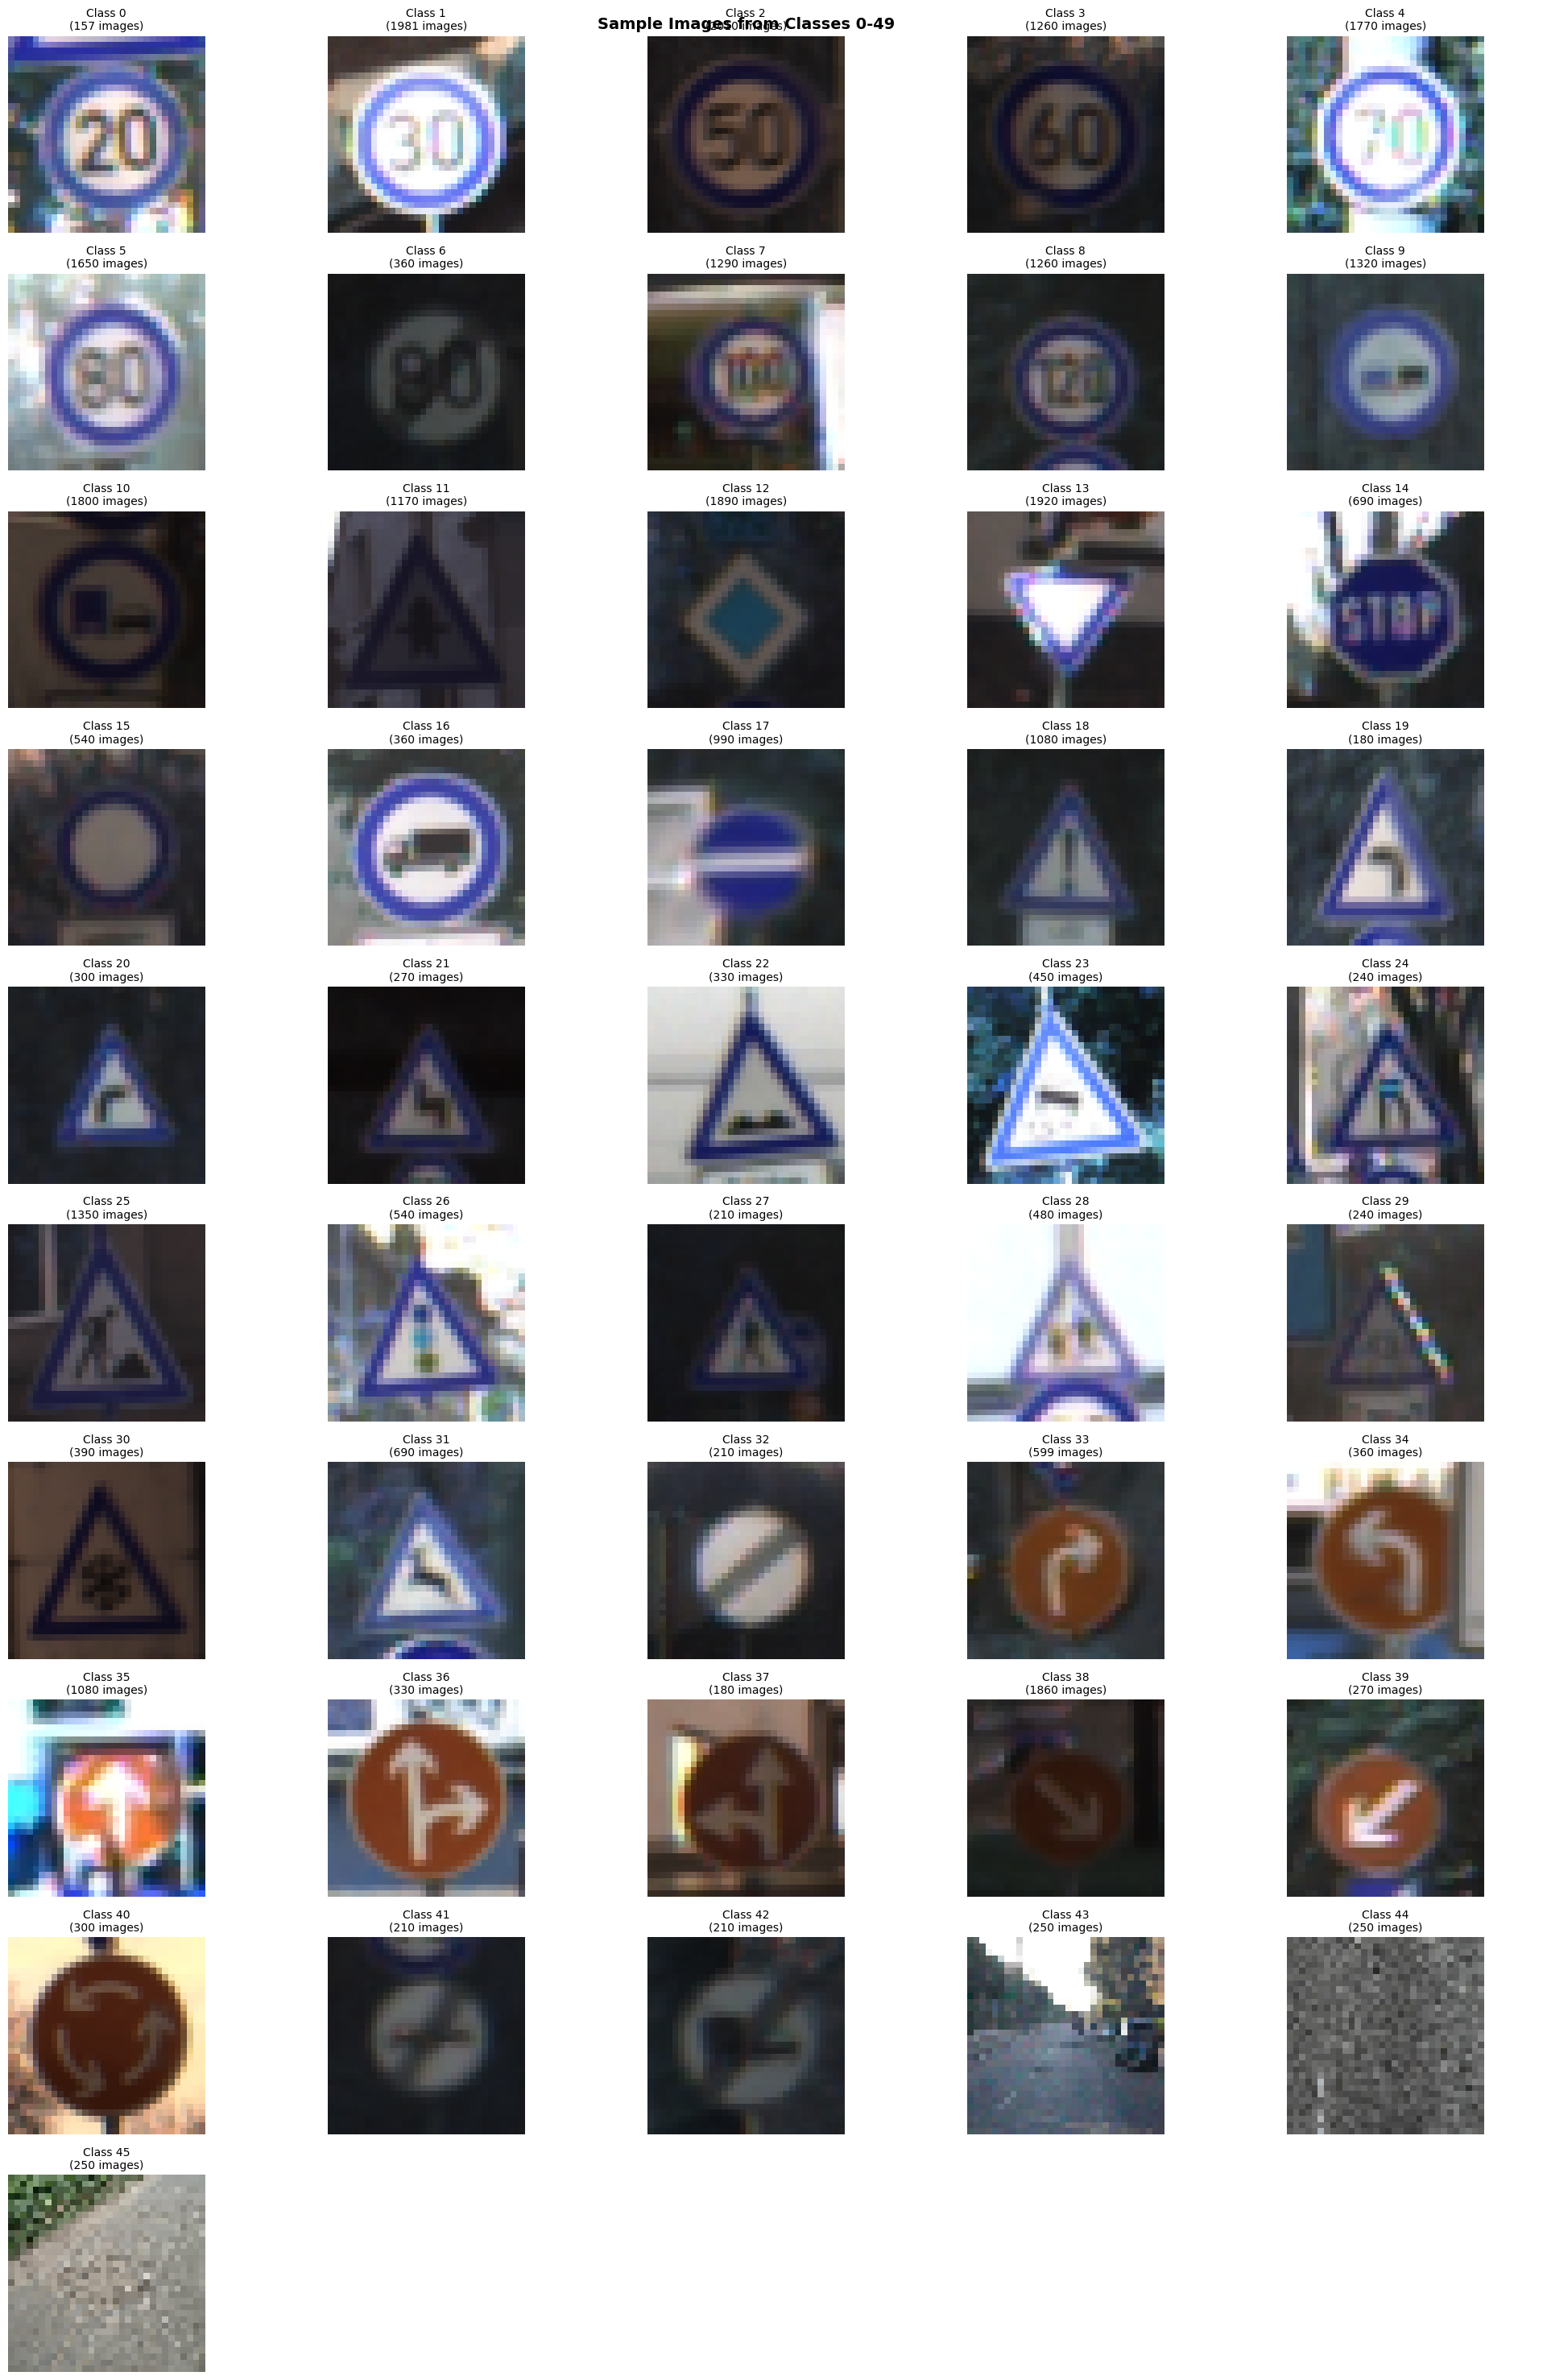

In [24]:
# Fixed version of sample images plot
def plot_sample_images_fixed(features, target, n_samples=1, max_classes=50):
    """Plot sample images with size limits"""
    
    # Get unique classes (limit to prevent huge plots)
    unique_classes = np.unique(target)[:max_classes]
    n_classes = len(unique_classes)
    
    # Calculate reasonable grid size
    n_cols = min(5, n_classes)  # Max 5 columns
    n_rows = (n_classes + n_cols - 1) // n_cols
    
    # Limit figure size
    fig_width = min(50, n_cols * 4)
    fig_height = min(50, n_rows * 3)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Handle single row case
    if n_rows == 1:
        if n_cols == 1:
            axes = np.array([[axes]])
        else:
            axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for idx, class_id in enumerate(unique_classes):
        row = idx // n_cols
        col = idx % n_cols
        
        # Get sample images from this class
        class_indices = np.where(target == class_id)[0]
        if len(class_indices) > 0:
            sample_idx = np.random.choice(class_indices)
            
            # Display image
            if len(features[sample_idx].shape) == 3:
                axes[row, col].imshow(cv2.cvtColor(features[sample_idx], cv2.COLOR_BGR2RGB))
            else:
                axes[row, col].imshow(features[sample_idx], cmap='gray')
            
            axes[row, col].set_title(f'Class {class_id}\n({len(class_indices)} images)', fontsize=10)
            axes[row, col].axis('off')
        else:
            axes[row, col].text(0.5, 0.5, f'Class {class_id}\nNo images', 
                               ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].axis('off')
    
    # Hide empty subplots
    for idx in range(n_classes, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
    
    plt.suptitle(f'Sample Images from Classes 0-{max_classes-1}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Use the fixed function
plot_sample_images_fixed(features, target, max_classes=50)

In [25]:
# Add this at the beginning of your notebook to prevent memory issues
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 0
matplotlib.rcParams['agg.path.chunksize'] = 10000

# Close figures after showing to free memory
def safe_show():
    plt.show()
    plt.close('all')  # Close all figures to free memory

# Use safe_show() instead of plt.show()
safe_show()

Creating summary plots for 35527 images across 46 classes


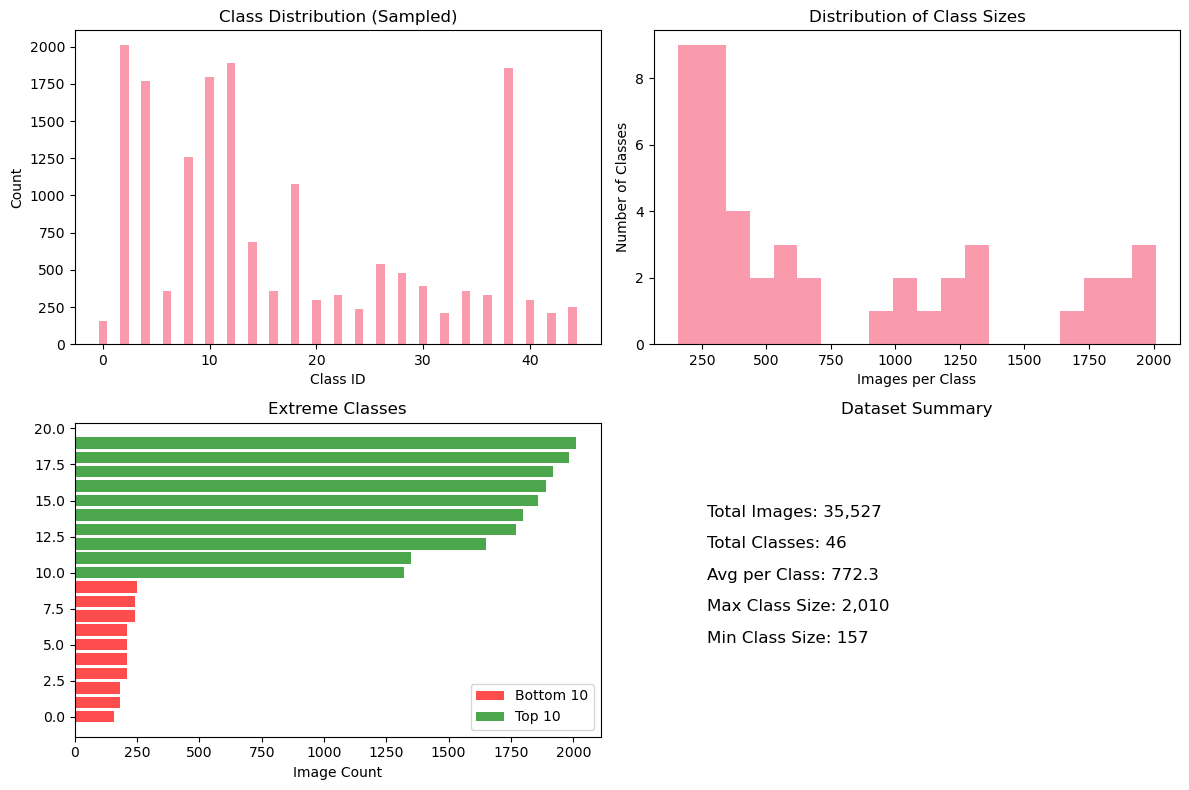

In [26]:
# For very large datasets, create summary visualizations
def create_summary_plots(features, target):
    """Create summary plots for large datasets"""
    
    print(f"Creating summary plots for {len(features)} images across {len(np.unique(target))} classes")
    
    # 1. Class distribution summary
    classes, counts = np.unique(target, return_counts=True)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    # Show only every 5th class if too many
    step = max(1, len(classes) // 20)
    plt.bar(classes[::step], counts[::step], alpha=0.7)
    plt.title('Class Distribution (Sampled)')
    plt.xlabel('Class ID')
    plt.ylabel('Count')
    
    plt.subplot(2, 2, 2)
    plt.hist(counts, bins=20, alpha=0.7)
    plt.title('Distribution of Class Sizes')
    plt.xlabel('Images per Class')
    plt.ylabel('Number of Classes')
    
    plt.subplot(2, 2, 3)
    # Show top 10 and bottom 10
    sorted_indices = np.argsort(counts)
    top_10 = sorted_indices[-10:]
    bottom_10 = sorted_indices[:10]
    
    plt.barh(range(10), counts[bottom_10], alpha=0.7, color='red', label='Bottom 10')
    plt.barh(range(10, 20), counts[top_10], alpha=0.7, color='green', label='Top 10')
    plt.title('Extreme Classes')
    plt.xlabel('Image Count')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.text(0.1, 0.7, f"Total Images: {len(features):,}", fontsize=12)
    plt.text(0.1, 0.6, f"Total Classes: {len(classes)}", fontsize=12)
    plt.text(0.1, 0.5, f"Avg per Class: {np.mean(counts):.1f}", fontsize=12)
    plt.text(0.1, 0.4, f"Max Class Size: {np.max(counts):,}", fontsize=12)
    plt.text(0.1, 0.3, f"Min Class Size: {np.min(counts):,}", fontsize=12)
    plt.title('Dataset Summary')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close('all')

# Use summary plots for large datasets
create_summary_plots(features, target)

334/334 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


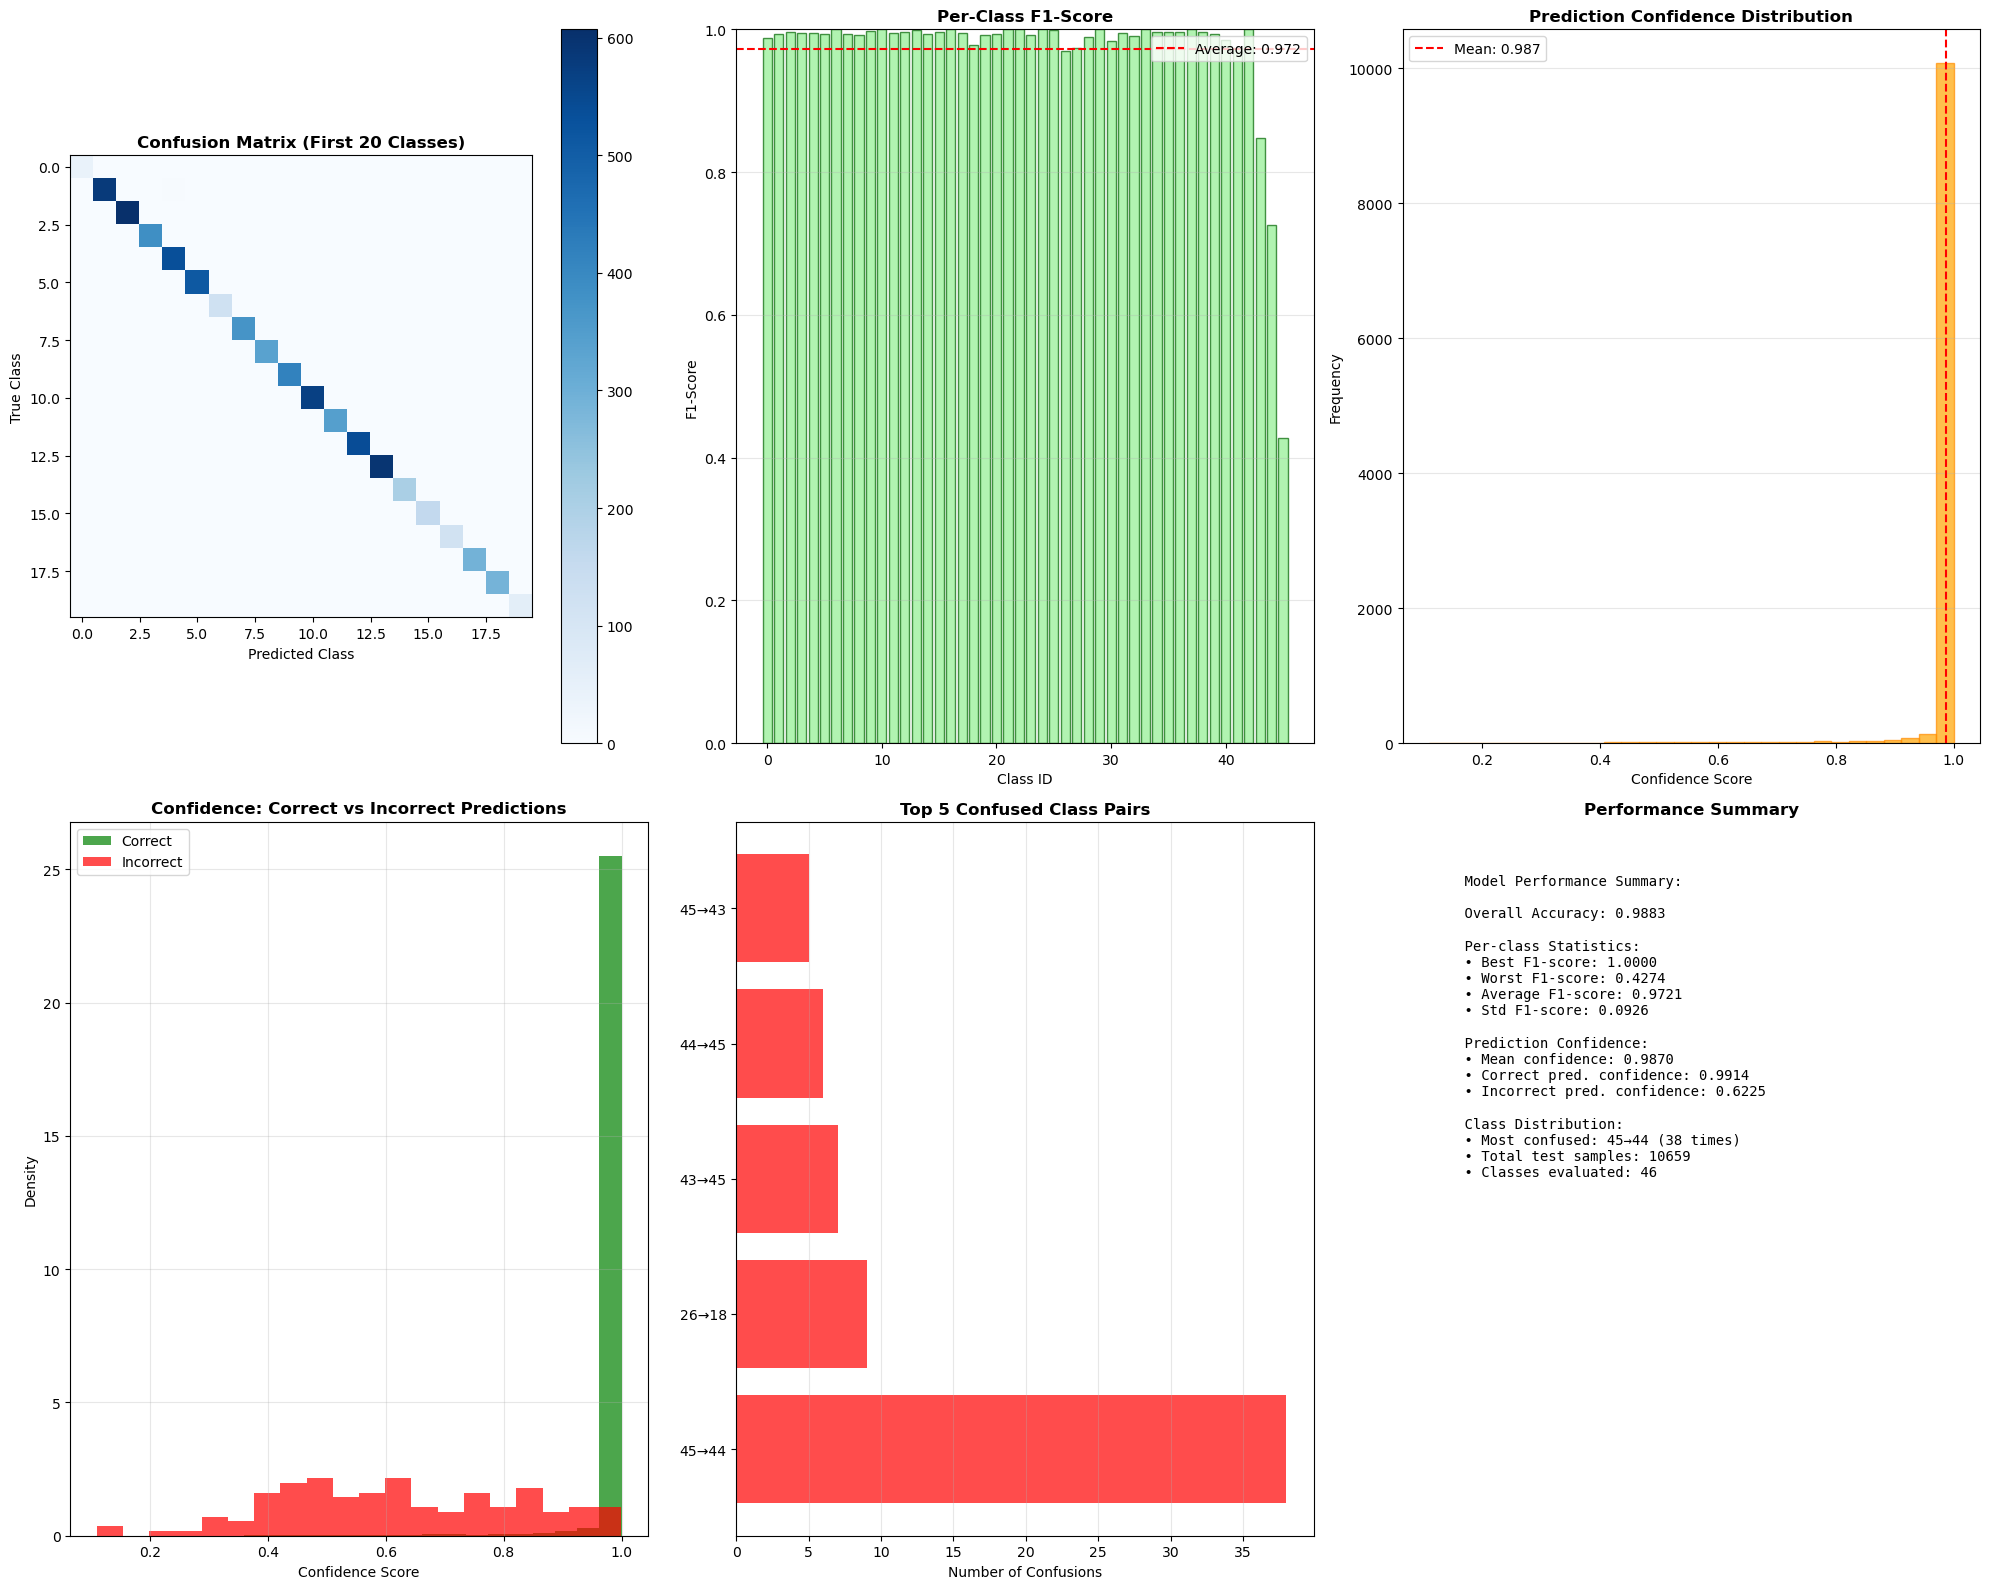

In [27]:
# Add this cell after model evaluation
# Model Performance Analysis

def analyze_model_performance(model, X_test, y_test):
    """Comprehensive model performance analysis"""
    
    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Calculate per-class accuracy
    from sklearn.metrics import classification_report, confusion_matrix
    
    # Classification report
    class_report = classification_report(y_true, y_pred, output_dict=True)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(20, 16))
    
    # 1. Confusion Matrix (for first 20 classes to keep readable)
    cm = confusion_matrix(y_true, y_pred)
    im1 = axes[0, 0].imshow(cm[:20, :20], cmap='Blues', interpolation='nearest')
    axes[0, 0].set_title('Confusion Matrix (First 20 Classes)', fontweight='bold')
    axes[0, 0].set_xlabel('Predicted Class')
    axes[0, 0].set_ylabel('True Class')
    plt.colorbar(im1, ax=axes[0, 0])
    
    # 2. Per-class accuracy
    class_accuracies = []
    class_ids = []
    for i in range(46):
        if str(i) in class_report:
            class_accuracies.append(class_report[str(i)]['f1-score'])
            class_ids.append(i)
    
    bars = axes[0, 1].bar(class_ids, class_accuracies, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
    axes[0, 1].set_title('Per-Class F1-Score', fontweight='bold')
    axes[0, 1].set_xlabel('Class ID')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Add horizontal line for average F1-score
    avg_f1 = np.mean(class_accuracies)
    axes[0, 1].axhline(y=avg_f1, color='red', linestyle='--', label=f'Average: {avg_f1:.3f}')
    axes[0, 1].legend()
    
    # 3. Prediction confidence distribution
    confidence_scores = np.max(y_pred_proba, axis=1)
    axes[0, 2].hist(confidence_scores, bins=30, color='orange', edgecolor='darkorange', alpha=0.7)
    axes[0, 2].set_title('Prediction Confidence Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Confidence Score')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].axvline(x=np.mean(confidence_scores), color='red', linestyle='--', 
                      label=f'Mean: {np.mean(confidence_scores):.3f}')
    axes[0, 2].legend()
    axes[0, 2].grid(axis='y', alpha=0.3)
    
    # 4. Correct vs Incorrect predictions confidence
    correct_mask = (y_pred == y_true)
    correct_conf = confidence_scores[correct_mask]
    incorrect_conf = confidence_scores[~correct_mask]
    
    axes[1, 0].hist(correct_conf, bins=20, alpha=0.7, color='green', label='Correct', density=True)
    axes[1, 0].hist(incorrect_conf, bins=20, alpha=0.7, color='red', label='Incorrect', density=True)
    axes[1, 0].set_title('Confidence: Correct vs Incorrect Predictions', fontweight='bold')
    axes[1, 0].set_xlabel('Confidence Score')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 5. Top confused classes
    np.fill_diagonal(cm, 0)  # Remove diagonal for confusion analysis
    max_confusion = np.unravel_index(np.argmax(cm), cm.shape)
    
    # Find top 10 most confused pairs
    confusion_pairs = []
    flat_indices = np.argsort(cm.flatten())[-10:]
    for idx in flat_indices:
        i, j = np.unravel_index(idx, cm.shape)
        if cm[i, j] > 0:
            confusion_pairs.append((i, j, cm[i, j]))
    
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    
    # Plot confusion pairs
    if confusion_pairs:
        pairs_str = [f"{pair[0]}→{pair[1]}" for pair in confusion_pairs[:5]]
        confusion_counts = [pair[2] for pair in confusion_pairs[:5]]
        
        axes[1, 1].barh(pairs_str, confusion_counts, color='red', alpha=0.7)
        axes[1, 1].set_title('Top 5 Confused Class Pairs', fontweight='bold')
        axes[1, 1].set_xlabel('Number of Confusions')
        axes[1, 1].grid(axis='x', alpha=0.3)
    
    # 6. Model summary statistics
    accuracy = np.mean(y_pred == y_true)
    
    stats_text = f"""
    Model Performance Summary:
    
    Overall Accuracy: {accuracy:.4f}
    
    Per-class Statistics:
    • Best F1-score: {max(class_accuracies):.4f}
    • Worst F1-score: {min(class_accuracies):.4f}
    • Average F1-score: {avg_f1:.4f}
    • Std F1-score: {np.std(class_accuracies):.4f}
    
    Prediction Confidence:
    • Mean confidence: {np.mean(confidence_scores):.4f}
    • Correct pred. confidence: {np.mean(correct_conf):.4f}
    • Incorrect pred. confidence: {np.mean(incorrect_conf):.4f}
    
    Class Distribution:
    • Most confused: {confusion_pairs[0][0]}→{confusion_pairs[0][1]} ({confusion_pairs[0][2]} times)
    • Total test samples: {len(y_test)}
    • Classes evaluated: {len(class_ids)}
    """
    
    axes[1, 2].text(0.05, 0.95, stats_text, transform=axes[1, 2].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace')
    axes[1, 2].set_title('Performance Summary', fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'class_report': class_report,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Analyze model performance
performance_results = analyze_model_performance(model, X_test, y_test)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


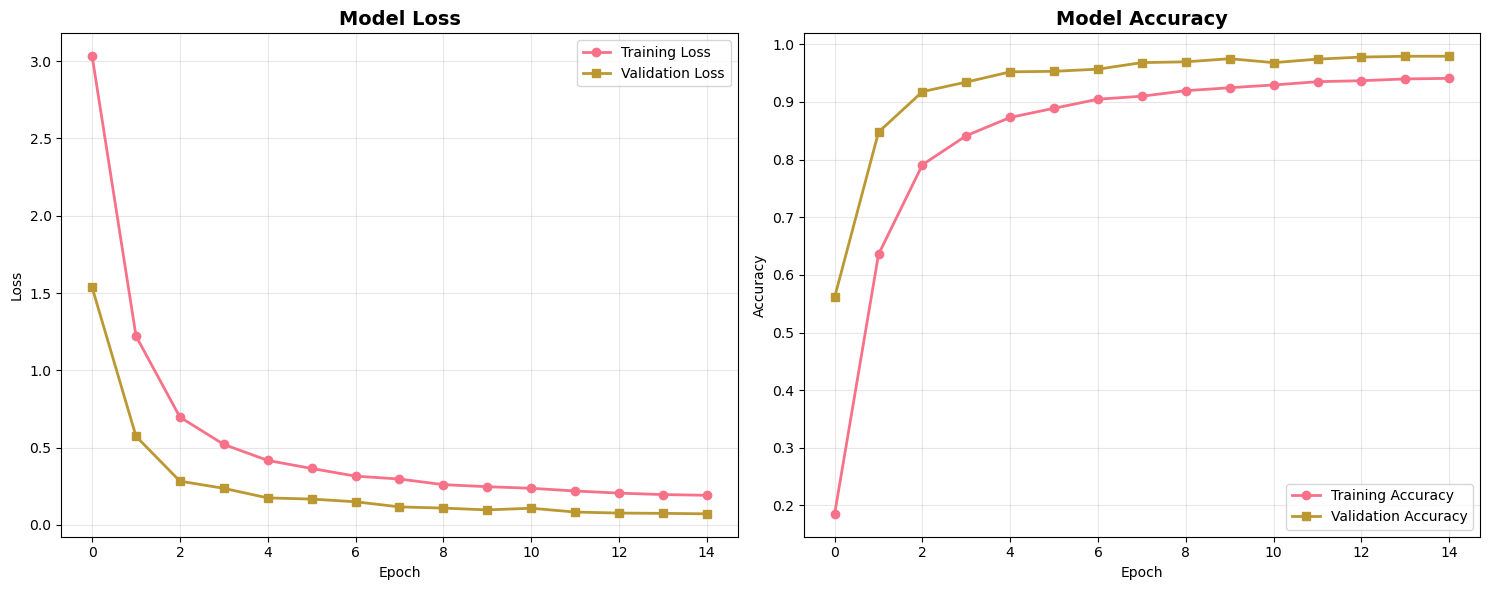

In [28]:

# history = model.fit(datagen.flow(X_train, y_train, batch_size=30), epochs=15)

def plot_training_history(history):
    """Plot training history"""
    
    if history is None:
        print("No training history available. Modify model.fit() to save history.")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot training loss
    axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
    print(history.history.keys())
    if 'val_loss' in history.history:
        axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
    axes[0].set_title('Model Loss', fontweight='bold', fontsize=14)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot training accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
    if 'val_accuracy' in history.history:
        axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
    axes[1].set_title('Model Accuracy', fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# If you have training history, uncomment the next line:
plot_training_history(history)

In [29]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\lmattaparthi\AppData\Local\Temp\ipykernel_13536\1532950779.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=[44, 45], palette="Set2")


Text(0.5, 1.0, 'Outlier Detection using Boxplot')

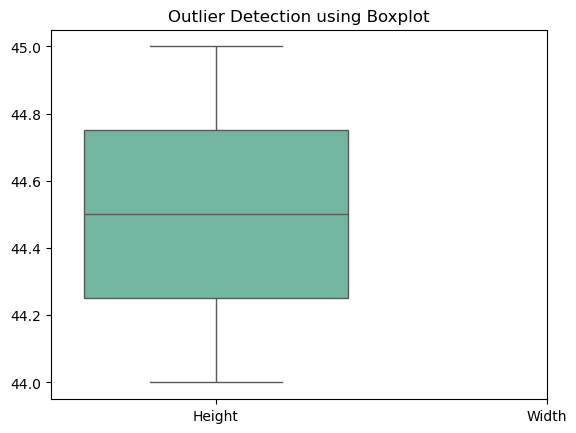

In [30]:
sns.boxplot(data=[44, 45], palette="Set2")
plt.xticks([0, 1], ["Height", "Width"])
plt.title("Outlier Detection using Boxplot")

In [31]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from torchvision import transforms
from PIL import Image
import os

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1))
])

img = Image.open("datasettraffic/1/1_2220_1577671991.586194.png")
augmented_img = transform(img)
augmented_img.save("datasettraffic/1/aug_1_2220_1577671991.586194.png")


ValueError: 'c' argument has 1143928 elements, which is inconsistent with 'x' and 'y' with size 24868.

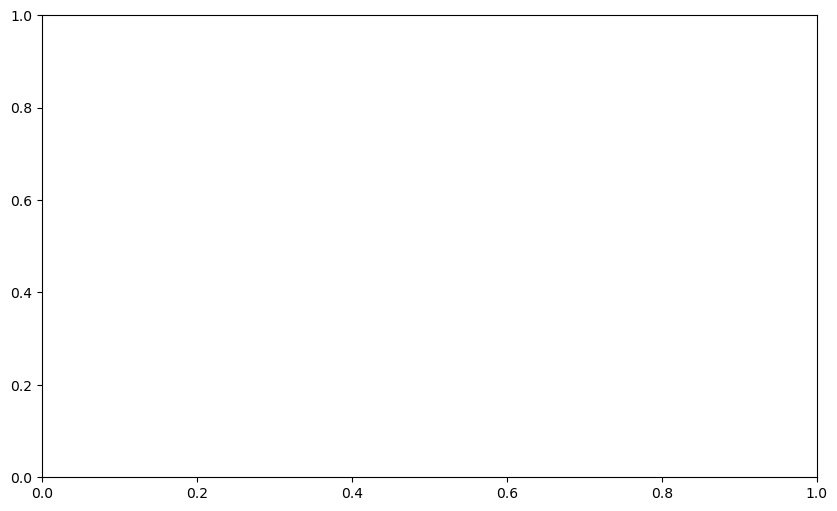

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Assuming you have variables like:
# X_train_scaled (e.g., shape: [n_samples, 32, 32, 3])
# y_train (labels)

# Flatten images for PCA
X = X_train.reshape((X_train.shape[0], -1))
y = y_train.flatten()  # Ensure labels are 1D

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2D PCA feature space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA-based Feature Extraction Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Simulated loss data over 30 epochs
np.random.seed(42)
losses = np.linspace(1.0, 0.2, 30) + np.random.normal(0, 0.05, 30)

plt.figure(figsize=(6, 4))
plt.plot(losses, marker='o')
plt.title("Simulated Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ACF and PACF
plot_acf(losses, lags=15, alpha=0.05)
plt.title("Autocorrelation of Training Loss")
plt.show()

plot_pacf(losses, lags=15, alpha=0.05, method='ywm')
plt.title("Partial Autocorrelation of Training Loss")
plt.show()



In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mfe = np.mean(y_pred - y_true)
r2 = r2_score(y_true, y_pred)

# Store results in a dictionary
metrics = {
    "MAE": mae,
    "RMSE": rmse,
    "MAPE (%)": mape,
    "MFE": mfe,
    "R2 Score": r2
}

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['steelblue', 'skyblue', 'orange', 'red', 'green'])
plt.title("Model Error Metrics")
plt.ylabel("Error Value")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()